# 인공신경망 실습

In [1]:
# !pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['label'] = iris.target

# 데이터 분할
y = df['label']
X = df.drop(['label'], axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                   stratify = y)

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# model 설정
model = Sequential() # 모델을 직렬로 잇는다.
model.add(Dense(8, input_dim = 4, activation = 'relu')) # 레이어 객체를 인자로 넘겨 모델에 더한다.
# 8개의 노드, dim = 4가지 속성
model.add(Dense(3, activation = 'softmax')) # 분류이므로 softmax, 3개 노드

In [6]:
# 모델 컴파일
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [7]:
# 모델 실행
model.fit(X_train, y_train, epochs = 50, batch_size = 4)

Epoch 1/50
28/28 [==============================] - 1s 3ms/step - loss: 1.8233 - accuracy: 0.0536
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 1.4727 - accuracy: 0.1161
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 1.2363 - accuracy: 0.2857
Epoch 4/50
28/28 [==============================] - 0s 4ms/step - loss: 1.0903 - accuracy: 0.3839
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 0.9785 - accuracy: 0.6071
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 0.8921 - accuracy: 0.7500
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.8264 - accuracy: 0.8571
Epoch 8/50
28/28 [==============================] - 0s 3ms/step - loss: 0.7740 - accuracy: 0.8393
Epoch 9/50
28/28 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.8036
Epoch 10/50
28/28 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.8214
Epoch 11/50
28/28 [

In [8]:
# 모델평가
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.3138 - accuracy: 0.9737


[0.3138180077075958, 0.9736841917037964]

In [9]:
model.predict(X_test)[0]

2/2 [==============================] - 0s 4ms/step


array([9.7015691e-01, 2.9081013e-02, 7.6218956e-04], dtype=float32)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


# 인공신경망 성능개선

In [11]:
from sklearn.datasets import load_boston

In [12]:
# 데이터 불러오기
boston = load_boston()
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
# 데이터 분할
y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim = 13, activation = 'relu'))
model.add(Dense(1, activation ='relu'))          

In [14]:
# 모델 컴파일
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
              metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                224       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 모델 실행
model.fit(X_train, y_train, epochs = 50, batch_size = 10)

Epoch 1/50
38/38 [==============================] - 1s 3ms/step - loss: 622.8501 - mse: 622.8501
Epoch 2/50
38/38 [==============================] - 0s 3ms/step - loss: 604.6300 - mse: 604.6300
Epoch 3/50
38/38 [==============================] - 0s 3ms/step - loss: 604.0040 - mse: 604.0040
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 603.6611 - mse: 603.6611
Epoch 5/50
38/38 [==============================] - 0s 3ms/step - loss: 599.8831 - mse: 599.8831
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 533.6737 - mse: 533.6738
Epoch 7/50
38/38 [==============================] - 0s 3ms/step - loss: 177.1732 - mse: 177.1732
Epoch 8/50
38/38 [==============================] - 0s 3ms/step - loss: 82.5993 - mse: 82.5993
Epoch 9/50
38/38 [==============================] - 0s 3ms/step - loss: 75.4856 - mse: 75.4856
Epoch 10/50
38/38 [==============================] - 0s 3ms/step - loss: 72.4899 - mse: 72.4899
Epoch 11/50
38/38 [================

In [16]:
y_pred = model.predict(X_test)
y_pred[0]

4/4 [==============================] - 0s 0s/step


array([27.449785], dtype=float32)

In [17]:
y_test[0]

24.0

In [18]:
result = pd.DataFrame({'y':y_test.values, 'y_pred' : y_pred, 'diff' : y_test.values - y_pred,
                       'diff(abs)' : np.abs(y_test.values - y_pred)})
result.sort_values(by = ['diff'], ascending = False)

ValueError: Per-column arrays must each be 1-dimensional

In [19]:
history= model.fit(X_train, y_train, epochs = 500, verbose = 0, validation_split = 0.2)

In [20]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0,40])
    plt.xlabel("Epoch")
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

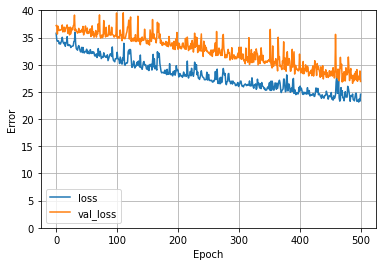

In [21]:
plot_loss(history)

## 모델 정규화

In [22]:
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization(axis = -1)
normalizer.adapt(np.array(X_train))

normalized_model = Sequential()
normalized_model.add(normalizer)
normalized_model.add(Dense(16,activation = 'relu'))
normalized_model.add(Dense(1, activation = 'relu'))

normalized_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 16)                224       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 268
Trainable params: 241
Non-trainable params: 27
_________________________________________________________________


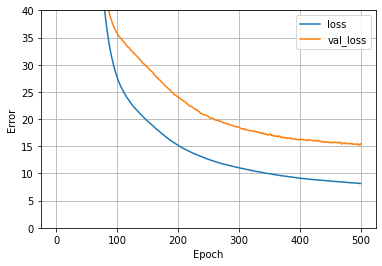

In [23]:
normalized_model.compile(loss = 'mean_squared_error',
                        optimizer = 'adam',
                        metrics = ['mse'])

normalized_history = normalized_model.fit(X_train, y_train, epochs = 500,
                                         verbose = 0, validation_split = 0.2)

plot_loss(normalized_history)

4/4 [==============================] - 0s 0s/step


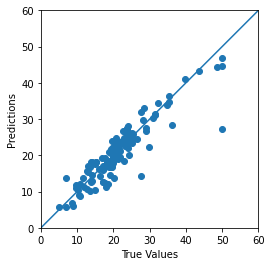

In [24]:
y_pred = normalized_model.predict(X_test).flatten()


a = plt.axes(aspect = 'equal')
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0,60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [25]:
result = pd.DataFrame({'y':y_test.values, 'y_pred' : y_pred, 'diff' : y_test.values - y_pred,
                       'diff(abs)' : np.abs(y_test.values - y_pred)})
result.sort_values( by = ['diff(abs)'], ascending = False)

,y,y_pred,diff,diff(abs)
96,50.0,27.354229,22.645771,22.645771
111,27.5,14.234193,13.265807,13.265807
113,36.2,28.394472,7.805528,7.805528
15,29.8,22.230000,7.570000,7.570000
79,7.0,13.652115,-6.652115,6.652115
...,...,...,...,...
17,10.2,10.316211,-0.116211,0.116211
4,16.1,16.153093,-0.053093,0.053093
126,23.1,23.064045,0.035955,0.035955
88,25.0,25.017586,-0.017586,0.017586


<AxesSubplot:xlabel='diff', ylabel='Count'>

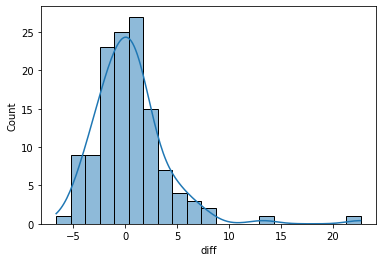

In [26]:
sns.histplot(data = result['diff'], kde = True)

In [27]:
#!pip install graphviz

In [ ]:
# !pip install pydot

In [28]:
from tensorflow.keras.utils import plot_model

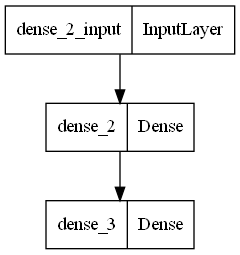

In [29]:
# 시각화
tf.keras.utils.plot_model(model, to_file = "model2.png")

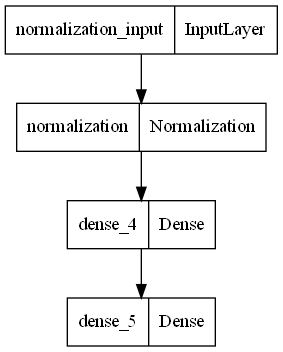

In [30]:
# 시각화
tf.keras.utils.plot_model(normalized_model, to_file = "model3.png")

In [ ]:
# !pip install pyparsing

In [ ]:
# !pip install graphviz

In [ ]:
# conda install graphviz

In [ ]:
# conda install pydot